# Introduction and Table of Contents

Hi! This executable Jupyter notebook is made by Gerson Gerard Cruz and Juan Glicerio Manlapaz.

This notebook contains the following: <br>

I. Explanations of Root Finding Algorithms:
   1. Fixed Point Iteration Method <br>
       a. Code <br>
       b. Practice Problem <br>
       c. Visualization <br>
   2. Bisection Method <br>
       a. Code <br>
       b. Practice Problem <br>
       c. Visualization <br>
   3. Newton-Raphson Method <br>
       a. Code <br>
       b. Practice Problem <br>
       c. Visualization <br>
   4. Secant Method <br> 
       a. Code <br>
       b. Practice Problem <br>
       c. Visualization <br>

II. Additional Root Finding Method: Muller's Method <br>
III. Application of Root Finding Algorithm: Newton-Raphson <br>
IV. Runtime Comparison of Root Finding Algorithms in Julia, C++, and Python <br>
V. References

# I. Explanations of Root Finding Algorithms

# 1. Fixed Point Iteration

Consider a value $p$ and function $f(x)$. Assume that $p$ is a root of $f(x)$ and that $f(p) = 0$. A way to find the value of $p$ is to consider another function, say $g(x)$, and we have the function return the value $p = g(p)$. This is a definition of a fixed-point problem and we can try to use this concept to find the root of $f(x)$. Below are the equations needed to find the rooft of $f(x)$.

$$g(p) = p$$
$$f(p) = 0$$

The Fixed Point Iteration tries to relate the root finding problem and the fixed point problem. We do this by modifying $f(x)$ into the form:

$$ x = g(x) $$

From here, we can perform iteration and our working algorithm will be:

$$x_{n + 1} = g(x_n) $$

And by continuous iteration, $x_{n + 1}$ will be approximately equal to $x_n$. Once that happens, it is concluded that $p = x_n$ which is a root of $f(x)$.

## a. Code for Fixed Point Iteration

Below is a code for performing the fixed-point iteration written in Julia 1.5.1. The algorithm starts with an initial guess $x_0$, computes for $g(x_0)$ and pass this value to the variable $x_1$; which is then assigned to $x_0$ and the iteration repeats. The stopping criteria used involves the absolute error given by the formula: $|x_1 - x_0|$ from Okten, G (2020). Thus, the iteration stops when $|x_1 - x_0| < 10^{-7}$. The fixed point iteration is assigned to a function name `fixedpt`.

In [1]:
#Code for Fixed Point Iteration
function fixedpt(g::Function, x_zero, tolerance, max_iterations)
    iterations = 1
    
    while iterations <= max_iterations
        
        x_one = g(x_zero)
        if abs(x_one - x_zero) < tolerance #Stopping criterion
            return println("The root is $x_one and the iteration number is $iterations")
        end
        
        x_zero = x_one
        iterations = iterations + 1
    end
    
    println("The Fixed Point Method failed to find a root. The last estimate was x = $x_zero")
end

fixedpt (generic function with 1 method)

## b. Practice Problem

Problem taken from Kreyszig (10th Edition), page 807

Sketch $f(x) = x^3 - 5.00x^2 + 1.01x + 1.88$, showing the roots near $\pm 1$ and $5$. Write $x = g(x) = (5.00x^2 - 1.01x - 1.88)/x^2$. Find a root starting from $x_0 = 5, 4, 1, -1$. 

In [2]:
function g(x)
    return (5.00x^2 - 1.01x - 1.88)/(x^2)
end

g (generic function with 1 method)

In [3]:
# Solution
# for x = 5

x_zero = 5
tolerance = 10^-7
max_iterations = 20

fixedpt(g, x_zero, tolerance, max_iterations)

The root is 4.700000006855491 and the iteration number is 7


In [4]:
# for x = 4
x_zero = 4
fixedpt(g, x_zero, tolerance, max_iterations)

The root is 4.699999998229231 and the iteration number is 8


In [5]:
# for x = 1
x_zero = 1
fixedpt(g, x_zero, tolerance, max_iterations)

The root is 4.699999998530467 and the iteration number is 10


In [6]:
# for x = -1
x_zero = -1
fixedpt(g, x_zero, tolerance, max_iterations)

The root is 4.699999998620523 and the iteration number is 9


## c. Visualization of the Fixed Point Iteration

We will  perform the Fixed Point Iteration and we will visualize the convergence to $4.7$

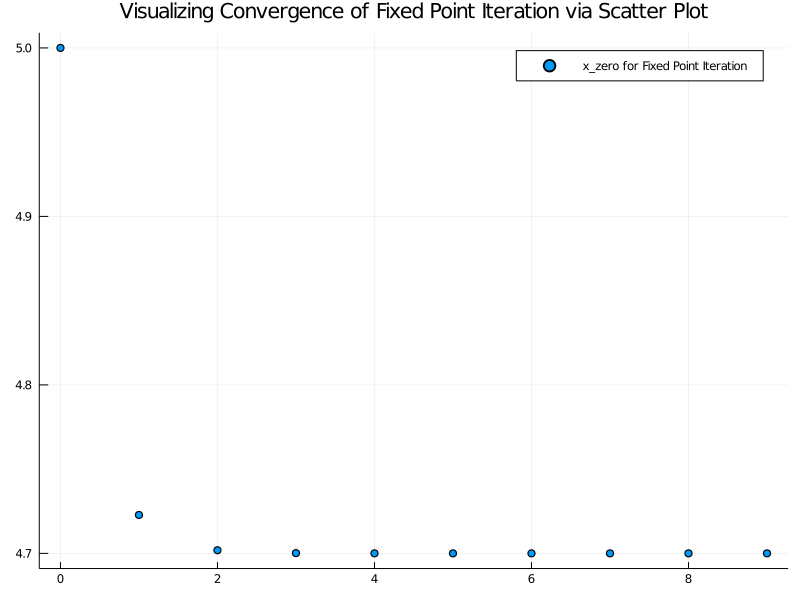

In [7]:
using Plots
#FPI Code to Return a DataFrame
x_0 = 5
n = 1

N = [0]
x = [x_0]

while n < 10
    x_1 = g(x_0)
    x_0 = x_1
    x = vcat(x, x_1) #appending to array x
    N = vcat(N, n) #appending to array N
    n += 1
end

plot(N, x, seriestype = "scatter", title = "Visualizing Convergence of Fixed Point Iteration via Scatter Plot", label = "x_zero for Fixed Point Iteration", size=(800,600))

In the figure above we see the convergence of values to $4.7$! 

Alternatively, we can verify the the value $p$ by taking the graphs of $g(x)$ and $x$.

### Graph for g(x) to illustrate the Fixed Point Iteration

In [8]:
function g(x)
    return (5.00x^2 - 1.01x - 1.88)/(x^2)
end

g (generic function with 1 method)

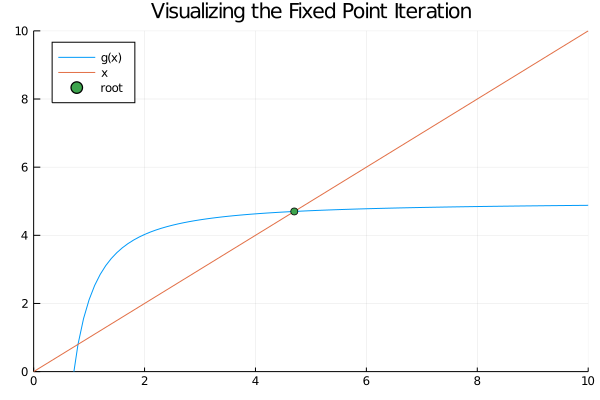

In [9]:
plot(g, -10:0.1:10, xlim = (0,10), ylim = (0,10), title = "Visualizing the Fixed Point Iteration", labels = "g(x)", legend=:topleft)
plot!(x -> x, -10:0.1:10, label = "x", legend=:topleft)
scatter!([4.7], [4.7], label="root")

# 2. Bisection Method

Recall the Intermediate Value Theorem (IVT). The IVT states that if a continuous function $f$ exists between $a$ and $b$, then that function can take any value $f(a)$ and $f(b)$ over the interval. 

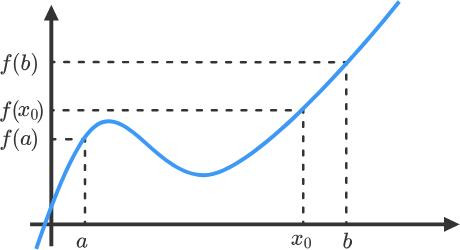

Therefore, if the continuous function $f$ defined on $[a,b]$ satisfies $f(a)f(b) < 0$, then there exists $c \in [a,b]$, such that $f(c) = 0$. 

Thus, the bisection method operates on the idea of the IVT. At each iteration point, we divide the interval $[a,b]$ into subintervals and evaluate the function at the midpoint. Then, the subinterval that does not contain the root, that is, $f(a)f(b) > 0$, is discarded and the process is iterated into the other subinterval until the root is approximated and/or max iterations reached.  

## a. Code for Bisection Method

Below is a code for performing the bisection method written in Julia 1.5.1. The algorithm starts with two initial interval guesses $a$ and $b$, computes for $midpoint$. The function checks if the root lies to the left of the midpoint or to the right of the midpoint via the IVT and the iteration repeats. The stopping criteria used involves the absolute error given by the formula: $|x_1 - x_0|$ from Okten, G (2020). Thus, the iteration stops when $|a - b| < 10^{-7}$. The bisection method iteration is assigned to a function name `bisection_method`.

In [10]:
function bisection_method(f::Function, a, b, tolerance, max_iterations)
    
    # Checking if there is a root in the specified interval [a,b]
    if f(a)*f(b) > 0
        return println("There is no root in the specified interval because f(a) * f(b) > 0! Please input another interval and run the function again")
    end
    
    # Setting up counters and root validator
    iterations = 1
    midpoint = 0
    
    # While loop that contains bisection method iteration
    while iterations <= max_iterations
        #midpoint
        midpoint = a + (b-a)/2
        if f(midpoint) == 0 || abs(a-b) < tolerance
            return println("The root is $midpoint and the iteration number is $iterations")
        end
        
        if f(a)*f(midpoint) < 0 #If this is true, this means the root exists from the interval [a, midpoint]
            b=midpoint
            else #The root exists from the interval [b, midpoint]
            a=midpoint
            
        end
        iterations = iterations + 1
    end
    
    #For non-convergence 
    
    last_value = f(midpoint)
    println("The Bisection Method failed to find the root. The last iteration had $midpoint with function value at $last_value")
end

bisection_method (generic function with 1 method)

## b. Practice Problem

Let $f(x) = x^3 - 5x^2 + 1.01x + 1.88$ and find a root starting from $x_0 = 5,4,1,-1$.

In [11]:
function f(x)
    return x^3 - 5x^2 + 1.01x + 1.88
end

f (generic function with 1 method)

In [12]:
a = 0
b = 1
tolerance = 10^-7
max_iterations = 30

bisection_method(f, a, b, tolerance, max_iterations)

The root is 0.7999999821186066 and the iteration number is 25


In [13]:
a = -1
b = 0

bisection_method(f, a, b, tolerance, max_iterations)

The root is -0.5 and the iteration number is 1


In [14]:
# Showing that the checking works
a = -2
b = -1

bisection_method(f, a, b, tolerance, max_iterations)

There is no root in the specified interval because f(a) * f(b) > 0! Please input another interval and run the function again


In [15]:
a = 4
b = 5

bisection_method(f, a, b, tolerance, max_iterations)

The root is 4.700000017881393 and the iteration number is 25


## c. Visualization for Bisection Method

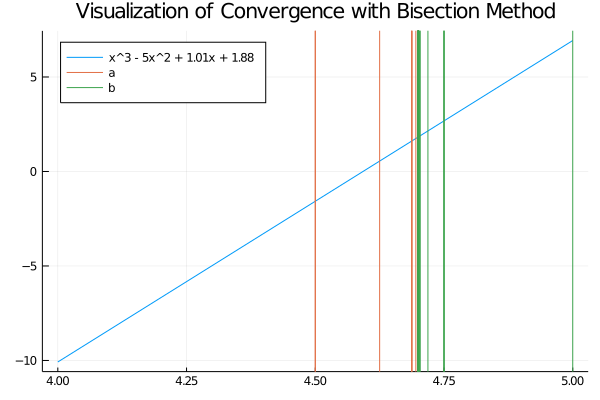

In [30]:
using Plots
#Setting up arrays 

a_array = []
b_array = []
a = 4
b = 5
iterations = 1
max_iterations = 30


#Using Bisection method to get the intervals [a,b]
while iterations <= max_iterations
        #midpoint
        midpoint = a + (b-a)/2
        if f(midpoint) == 0 || abs(a-b) < 10^-7
        end
        if f(a)*f(midpoint) < 0 #If this is true, this means the root exists from the interval [a, midpoint]
            b=midpoint
            push!(b_array, b)
            push!(a_array, a)
            else #The root exists from the interval [b, midpoint]
            a=midpoint
            push!(a_array, a)
            push!(b_array, b)
        end
        iterations = iterations + 1
    end

convert(Array{Float64,1}, a_array)
convert(Array{Float64,1}, b_array)

plot(f, 4:5, label = "x^3 - 5x^2 + 1.01x + 1.88", title = "Visualization of Convergence with Bisection Method", legend=:topleft)
plot!(a_array, seriestype="vline", label = "a")
plot!(b_array, seriestype = "vline", label = "b")

Thus, we see that the intervals $a$ and $b$ converge at roughly around $4.7$ in accordance to the results!

# 3. Newton-Raphson Method
The Newton-Raphson Method is another iteration method for solving $f(x) = 0$ such that $f$ has acontinuous derivative $f'$. Suppose we are going to solve for $f(x) = 0$ with $x_0$ as our initial value. Let $x_1$ be the point of intersection of the slope and the $x$-axis. The slope tangent to the function $f(x)$ at point $x_0$ is:

$$f'(x_0) = \frac{f(x_0)}{x_0 - x_1}$$

Rearranging the equation by isolating $x_1$ and we'll have:

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$

This will be our working iteration process, hence the following expression:

$$x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

To conclude, the Newton-Raphson Method tries to solve the equation $f(x) = 0$ by using the derivative of $f(x)$ and nothing else. This method is more applicable because of its speed and its application to transcendental equations such as exponential equations, trigonometric equations, and other non-polynomial equations.

### Error Derivation for Newton-Raphson Method

In order to derive the error estimate for the Newton-Raphson Method, let us consider a function, $f$, satisfying the Newton-Raphson Method and converges to the root, $c$. Let $x_1$ be the root approximate across all iterations of the method. 

Since $c$ is the root of f, then $f(c) = 0$. Knowing this fact, we can apply the Mean Value Theorem (MVT) which states that, if $f$ is a continuous function on the closed interval $[a,b]$ and differentiable on the open interval $(a,b)$ such that the tangent at $c$ is parallel to the secant line through the endpoints $(a, f(a))$ and $(b, f(b))$, that is, 

$$ f^{'}(c) = \frac{f(b) - f(a)}{b-a} \;\;\; (4) $$

Thus, with the MVT, for some point, $p$, between the root, $c$ and the approximate root, $x_1$, we have:

$$ f^{'}(p) = \frac{f(x_1) - f(c)}{x_1-c} \;\;\; (5) $$ 

Since$f(c) = 0$ and by doing some algebraic manipulations, we have:

$$ c - x_1 = - \frac{f(x_1)}{f^{'}(p)} \;\;\; (6) $$

which gives us the absolute error of the Newton-Raphson method!

However, $p$ is not necessarily known so we must do an approximation. Since $x_1$ is close to $c$ and since $p$ is close to $x_1$ as it is between $x_1$ and $c$, the error can be approximated as:

$$ c - x_1 \approx \frac{f(x_1)}{f^{'}(x_1)} \;\;\; (7) $$ 

Substituting this approximate error to the general iteration formula, Equation (3), for the Newton-Raphson's Method gives us:

$$x_{n + 1} - x_n \approx c - x_1 \;\;\; (8)$$

Thus, we now have the allowable error or tolerance for our method to reach convergence such that $x_{n+1} - x{n} < error_{allowable}$ via the error approximation of the root subtracted by the root approximate, $c - x_1$.

## a. Code for Newton-Raphson Method

In [17]:
function newton_raphson(f::Function, fprime::Function, x_0, tolerance, max_iterations)
    
    #Initializing values 
    iterations = 1
    x_1 = 0 
    
    #Using the Newton-Raphson formula
    while iterations <= max_iterations
        x_1 = x_0 - f(x_0)/fprime(x_0)
        if f(x_1) == 0 || abs(x_1 - x_0) < tolerance #Stopping criterion from Okten, G (2020)
            return println("The root is $x_1 and the iteration number is $iterations")
        end
        x_0 = x_1
        iterations = iterations+1
    end
    
    #For non-convergence
    last_value = f(x_1)
    println("The Newton-Raphson Method failed to find a root. The last iteration gives approximated root $x_1 with
function value $last_value")
    
end

newton_raphson (generic function with 1 method)

## b. Practice Problem

Taken from Kreyszig (10th Edition), page 807

Since Newton-Raphson is more viable for non-polynomials, we take a look at two problems:
    
1. $f(x) = 2x - \cos x, x_0 = 1$. <br>
2. $f(x) = x^3 - 5x^2 + 1.01x + 1.88$

In [18]:
function f_prime(x)
    return 3x^2 - 10x + 1.01
end

function f_2(x)
    return 2x - cos(x)
end

function f_2_prime(x)
    return 2 + sin(x)
end

f_2_prime (generic function with 1 method)

In [19]:
#Solving problem 1

x_0 = 1
tolerance = 10^-7
max_iterations = 20

newton_raphson(f_2, f_2_prime, x_0, tolerance, max_iterations)

The root is 0.4501836112948736 and the iteration number is 4


In [20]:
#Solving problem 2
x_0 = 4

newton_raphson(f, f_prime, x_0, tolerance, max_iterations)

The root is 4.699999999999999 and the iteration number is 6


## c. Visualizing the Convergence for the Newton-Raphson Method

0	4


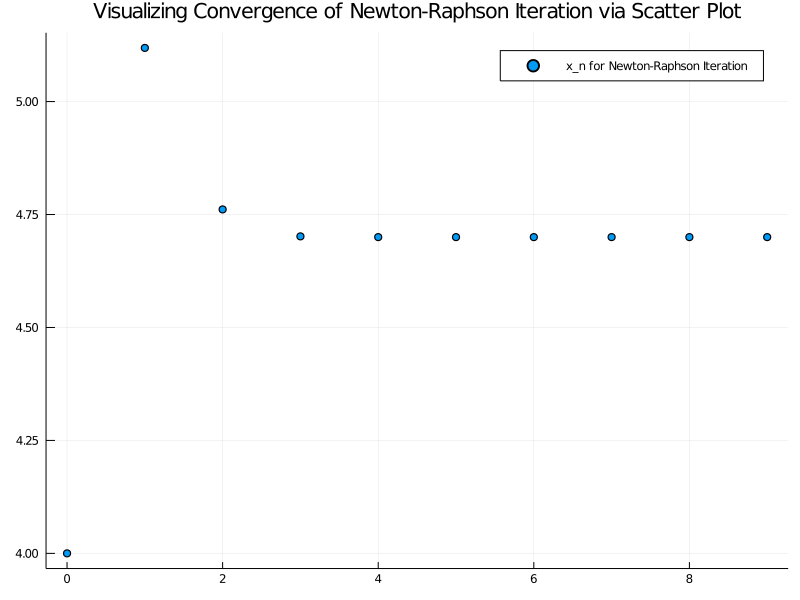

In [21]:
x_0 = 4
n = 1

x = [x_0]
N = [0]

println("0\t", x_0)
while n < 10
    x_1 = x_0 - (f(x_0)/f_prime(x_0))
    x_0 = x_1
    x = vcat(x, x_1)
    N = vcat(N, n)
    n += 1
end

plot(N, x, seriestype = "scatter", title = "Visualizing Convergence of Newton-Raphson Iteration via Scatter Plot", label = "x_n for Newton-Raphson Iteration", size=(800,600))

# 4. Secant Method

In order to understand the Secant Method of Root Finding, let us refer back to the Newton-Raphson method. The Newton-Raphson method aims to find an approximation of the root by calculating for value of the root, $x_n$, at the intersection of the x-axis and the tangent line of the graph of f at $(x_0, f(x_0))$. This process is then iterated for N number of times until a sufficiently close approximation is reached. This method, therefore, can be summarized with the following equation:

$$x_{n+1} = x_{n} - \frac{f(x_{n})}{f^{'}(x_{n})} \;\;\; (1) $$

Suppose, however, that the derivative $f^{'}(x_{n})$ is not explicitly known or computationally costly to calculate. There becomes a need for a new approximation method that does not rely calculating the derivative. The Secant method comes in by using the explicit definition of the slope, rise over run, instead of the derivative $f^{'}(x_n)$.

Knowing the definition of the slope as rise over run given by the formula:

$$ slope = \frac{y_2 - y_1}{x_2 - x_1} \;\;\; (2)  $$

We can then redefine $f^{'}(x_n)$ to be the slope at two chosen points $x_a$ and $x_b$ along the line and express it as:

$$ f^{'}(x_n) = \frac{f(x_n) - f(x_b)}{x_n - x_b} \;\;\; (3)  $$

Substituting in Equation (3) into Equation (1) gives us the general formula for the Secant method:

$$ x_{n+1} = x_{n} - \frac{f(x_n)(x_n - x_b)}{f(x_n)-f(x_b)} $$

The stopping criteria used involves the absolute error given by the formula: $|x_1 - x_0|$ from Okten, G (2020)

## a. Code for Secant Method

In [22]:
function secant_method(f::Function, x_b, x_n, tolerance, max_iterations)
    
    #Check if root exists in 
    if f(x_b)*f(x_n) > 0
        return println("There is no root in the specified interval because f(a) * f(b) > 0! Please input another interval and run the function again")
    end
    
    
    # Setting up counters and root validator
    iterations = 1
    x_new = 0
    
    #while loop with secant method formula
    while iterations <= max_iterations
        x_new = x_n - f(x_n) * (x_n - x_b) / (f(x_n) - f(x_b))
        
        #check if root is found or if x_new is less than the error which is close to 0
        if f(x_new) == 0 || abs(x_new - x_n) < tolerance #Tolerance level, stopping criterion from Okten, G. (2020)
            return print("The root is $x_new and the iteration number is $iterations")
        end
        x_b = x_n
        x_n = x_new
        iterations = iterations + 1
    end
    
    #For non-convergence
    last_value = f(x_new)
    
    println("The Secant Method failed to find the root. The last iterations gives root $x_new with function value $last_value")
end

secant_method (generic function with 1 method)

## b. Practice Problems for Secant Method

Once again, from Kreyszig (10th Edition), page 807 for standardization across problems.

$f(x) = x^3 - 5x^2 + 1.01x + 1.88$ and find a root starting from $x_0 = 5,4,1,-1$.

In [23]:
x_b = 2.5
x_n = 5.0
tolerance = 10^-7
max_iterations = 20

secant_method(f, x_b, x_n, tolerance, max_iterations)

The root is 4.6999999999996795 and the iteration number is 7

In [24]:
x_b = 0.5
x_n = 1

secant_method(f, x_b, x_n, tolerance, max_iterations)

The root is 0.7999999999975569 and the iteration number is 5

## c. Visualization for Secant Method

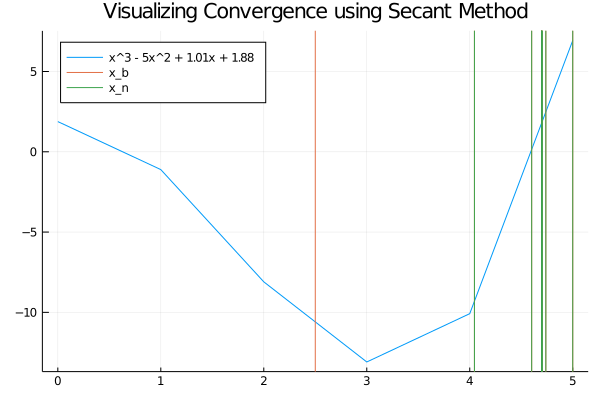

In [25]:
#Setting up arrays to hold x_b and x_n values

xb_array = []
xn_array = []
x_b = 2.5
x_n = 5
iterations = 1
max_iterations = 30

    while iterations <= max_iterations
        x_new = x_n - f(x_n) * (x_n - x_b) / (f(x_n) - f(x_b))
        
        #check if root is found or if x_new is less than the error which is close to 0
        if f(x_new) == 0 || abs(x_new - x_n) < 10^-7
        end
        push!(xb_array, x_b)
        push!(xn_array, x_n)
        x_b = x_n
        x_n = x_new
        iterations = iterations + 1
    end

convert(Array{Float64,1}, xb_array)
convert(Array{Float64,1}, xn_array)

plot(f, 0:5, title = "Visualizing Convergence using Secant Method", label = "x^3 - 5x^2 + 1.01x + 1.88", legend=:topleft )
plot!(xb_array, seriestype="vline", label = "x_b")
plot!(xn_array, seriestype = "vline", label = "x_n")

Thus, we see that the intervals $x_n$ and $x_b$ converge at roughly around $4.7$ in accordance to the results!

# II. Additional Root Finding Method

# Muller's Method

In order to dive into the Muller's Method, let us refer back to the Secant method. Recall that the Secant method using two function values projected as a straight line to the x-axis in order to estimate a root over a series of iterations. 

The Muller's method, does a similar approach, but instead of using two points and a line, it uses three points to project a parabola through three points as shown in the figure below. 

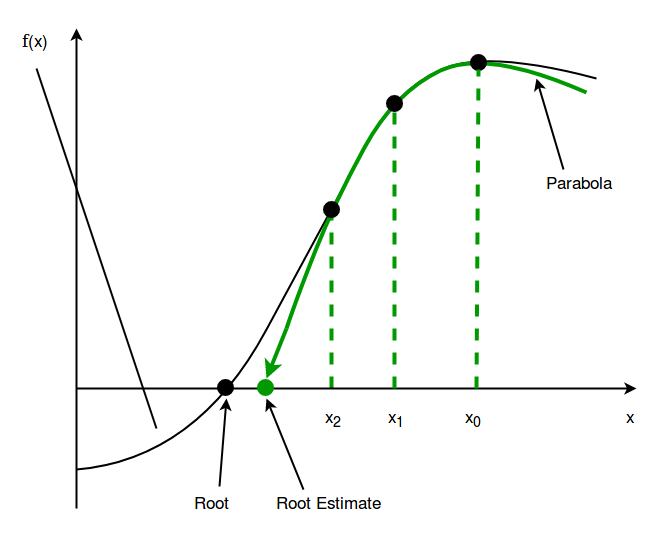

Muller's method will derive the coefficients of the parabola that goes through those three points. Then, these coefficients, $a$, $b$, $c$, will be substituted in the quadratic formula to obtain the root estimate which is the point where the parabola intercepts the x-axis. 

The following list of formulas are taken from Al-Imam Muhammad Ibn Saud Islamic University (IMSIU) site by D. Samy M. Ziou at: http://samymziouimamcourses.weebly.com/uploads/2/7/8/4/27847759/mullersmethod.pdf.

The Muller method is done using the parabolic equation, 

$$ f_2(x) = a(x - x_2)^2 + b (x - x_2)^2 + c \;\;\; (1)$$

Since we want the parabola to intersect the three points, we can evaluate Equation 1 based on the three points, $x_0$, $x_1$, $x_2$, using the following formulas: 

$$ f(x_0) = a(x_0 - x_2)^2 + b (x_0 - x_2)^2 + c \;\;\; (2)$$
$$ f(x_1) = a(x_1 - x_2)^2 + b (x_1 - x_2)^2 + c \;\;\; (3)$$
$$ f(x_2) = a(x_2 - x_2)^2 + b (x_2 - x_2)^2 + c \;\;\; (4)$$

Notice that in Equation 4, $a$ and $b$ are both 0. Hence, 

$$ c = f(x_2) \;\;\; (5)$$

Now we are left with Equations 2 and 3 to solve. 

Using algebraic manipulation according to D. Samy, we arrive at the formulas:

$$ a = \frac{f(x_0) - f(x_2)}{(x_0-x_2)(x_0-x_1)} - \frac{f(x_1) - f(x_2)}{(x_1-x_2)(x_0-x_1)} \;\;\; (6)$$

$$ b = \frac{(x_0 - x_2)(f(x_1) - f(x_2))}{(x_1-x_2)(x_0-x_1)} - \frac{(x_1 - x_2)(f(x_0) - f(x_2))}{(x_0-x_2)(x_0-x_1)} \;\;\; (7)$$



Finally, to finish up Muller's method, we need to make use of the quadratic formula, taking into consideration round-off error, and using the alternative formulation given by:

$$ x_{approximated root} = x_2 - \frac{-2c}{b\pm \sqrt{b^2-4ac}} $$

This gives the Muller method a distinct advantage of finding complex roots!

Finally, the stopping criteria used involves the absolute error given by the formula: $|x_1 - x_0|$ from Okten, G (2020)

## Code for Muller's Method

In [26]:
function muller_method(f::Function, x_0, x_1, x_2, tolerance, max_iterations)
    
    #Initializing counters and a, b, c, and im (for imaginary case)
    iterations = 1
    x_approx_root = 0
    a = 0
    b = 0
    c = 0
    im = 0
    
    while iterations <= max_iterations
        
        #using Equation 5
        c = f(x_2)
        
        #Using Equation 6
        a = ((f(x_0) - f(x_2)) / (x_0 - x_2)*(x_0 - x_1)) - ( (f(x_1) - f(x_2)) / (x_1 - x_2) * (x_0 - x_1) )
        
        #using Equation 7
        b = (((x_0 - x_2) * (f(x_1) - f(x_2)))) / ((x_1-x_2) * (x_0-x_1)) - (((x_1-x_2)*(f(x_0) - f(x_2))) / (x_0-x_2) * (x_0-x_1))
        
        #Computing for Imaginary Root
        
        imaginary = (Complex(b^2-4*a*c))^0.5
        
        if abs(b-imaginary) < abs(b+imaginary) #
            im = 2*c / (b+imaginary)
        else
            im = 2*c / (b-imaginary)
        end
        
        #Calculating for root estimate [Real and imaginary part]
        x_approx_root = x_2 - im
        
        if f(x_approx_root) == 0 || abs(x_approx_root - x_2) < tolerance #Tolerance level acceptable from Okten, G (2020)
            return println("The root is $x_approx_root and the iteration number is $iterations")
        end
        x_0 = x_1
        x_1 = x_2
        x_2 = x_approx_root
        
        iterations = iterations + 1
        
    end
    
     #For non-convergence 
    
        last_value = f(x_approx_root)
        println("The Muller Method failed to find a root. The last iteration had $x_approx_root with function value at $last_value")
end

muller_method (generic function with 1 method)

## Practice Problems for Muller Method

Sketch $f(x) = x^3 - 5x^2 + 1.01x + 1.88$ and find a root starting from $x_0 = 5,4,1,-1$.

In [27]:
x_0 = 3
x_1 = 4
x_2 = 5
tolerance = 10^-7
max_iterations = 20 

muller_method(f, x_0, x_1, x_2, tolerance, max_iterations)

The root is 4.699999999915395 + 0.0im and the iteration number is 6


In [28]:
#To test for imaginary root let us use the function: x^2 + 4x + 5

x_0 = 0
x_1 = 5
x_2 = 10
max_iterations = 40

muller_method(x -> x^2 + 4x + 5, x_0, x_1, x_2, tolerance, max_iterations)

The root is -1.9999999984602344 - 1.0000000046504058im and the iteration number is 34


# III. Application of Root Finding Algorithm: Newton-Raphson

An example of applying root-finding algorithms is the classic arithmetic problem of obtaining the higher order root of a natural number. For example, suppose we want to approximate the fourth root of seven.

$$\sqrt[4]{7} = ?$$

To approximate, we can declare a variable $x$ as the fourth root of seven. Hence we can write:

$$x = \sqrt[4]{7}$$

We can rewrite this equation into a polynomial form $x^4 - 7$. From here, we can use this as our working function to implement a root finding algorithm and the variable $x$ will serve as the root that needs to be obtained in order to approximate $\sqrt[4]{7}$. Suppose we use the Newton-Raphson Method. 

Applying the Newton-Raphson Techinique, our iterative equation will be:

$$x_{n+1} = x_n - \frac{{x_n}^4 - 7}{\frac{d}{dx}({x_n}^4 - 7)} = x_n - \frac{{x_n}^4 - 7}{4{x_n}^3}$$

To start, our initial value will be $x_0 = 1$ and we like to iterate it 10 times.

In [29]:
newton_raphson(x -> x^4 - 7, x -> 4x^3, 1, 10^-7, 10)

The root is 1.6265765616977859 and the iteration number is 7


From the Newton-Raphson Method, we can see that $\sqrt[4]{7} \approx 1.6265765616977859$.

# IV. Runtime Comparison of Root Finding Algorithms in Julia, C++, and Python

In order to compare this runtime, we used the Sublime Text Editor (https://www.sublimetext.com/docs/3/) in order to run the Python and C++ code. For Julia, we used the function `@time` to measure the time to run the functions. 

### Data in Seconds

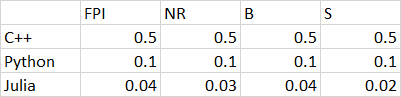

### Results Plot

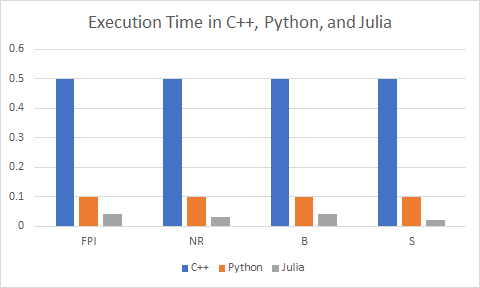



In this result, we see that Julia performed better than Python and C++! It is hypothesized, however, that as the code gets more computationally costly, C++ will become much faster than Python and maybe even Julia. Nonetheless, this shows the power that Julia holds!

# V. References

“Documentation,” Sublime Text. [Online]. Available: https://www.sublimetext.com/docs/3/. [Accessed: 20-Oct-2020]. <br>

“Julia 1.5 Documentation,” Julia Documentation · The Julia Language. [Online]. Available: https://docs.julialang.org/en/v1/. [Accessed: 23-Oct-2020]. <br>

Kreyszig, E. Advanced Engineering Mathematics. New York: John Wiley & Sons, 2006. <br>

Nagar, S., Beginning Julia programming for engineers and scientists. New York, NY: Apress, 2017.

Ökten, G., First Semester in Numerical Analysis with Julia. Tallahassee, FL: Florida State University Libraries, 2020. <br>

Ziou, S., “Muller's Method.” [Online]. Available: http://samymziouimamcourses.weebly.com/uploads/2/7/8/4/27847759/mullersmethod.pdf. <br>

http://www.math.ubc.ca/~israel/m210/lesson7.pdf 





